<h1><center>Machine Learning Algorithms</center></h1>

<h1><center>By Felicia Fryer</center></h1>

Python packages and modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import itertools
import pylab as pl
import scipy.optimize as opt
import time

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.externals.six import StringIO
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


%matplotlib inline 

Use popular machine learning algorithms: Decision Tree, Support Vector Machines, Neural Networks, k-Nearest Neighbors, and Boosting. I  will use these classification algorithms to build a model from historical data. Then you use the trained machine elarning algorithm to predict the target variable

<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Identifier|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

In [2]:
cancer_data = pd.read_csv("cancer.csv", delimiter=",")
cancer_data[0:5]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

In [3]:
cancer_data.shape

(699, 11)

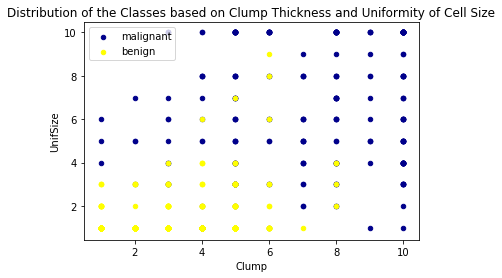

In [5]:
ax = cancer_data[cancer_data['Class'] == 4][:].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cancer_data[cancer_data['Class'] == 2][:].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.title ("Distribution of the Classes based on Clump Thickness and Uniformity of Cell Size")
plt.show()

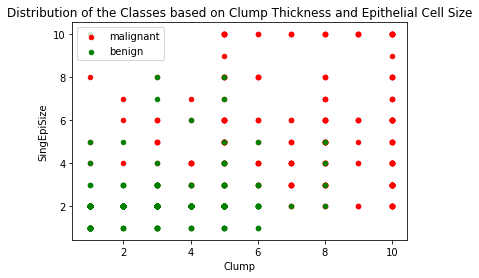

In [178]:
ax1 = cancer_data[cancer_data['Class'] == 4][:].plot(kind='scatter', x='Clump', y='SingEpiSize', color='Red', label='malignant');
cancer_data[cancer_data['Class'] == 2][:].plot(kind='scatter', x='Clump', y='SingEpiSize', color='Green', label='benign', ax=ax1);
plt.title ("Distribution of the Classes based on Clump Thickness and Epithelial Cell Size")
plt.show()

## Data Preprocessing and Selection

In [6]:
cancer_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:

In [4]:
cancer_data = cancer_data[pd.to_numeric(cancer_data['BareNuc'], errors='coerce').notnull()]
cancer_data['BareNuc'] = cancer_data['BareNuc'].astype('int')
cancer_data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [5]:
feature_df = cancer_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [6]:
cancer_data['Class'] = cancer_data['Class'].astype('int')
y = np.asarray(cancer_data['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## Cross-Validation for Decision Tree 

In [17]:
# 10-fold cross-validation with Decision Tree (before pruning)
dt = DecisionTreeClassifier(max_depth = 7)
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())


[0.92753623 0.94202899 0.92753623 0.92753623 0.95588235 0.92647059
 0.92647059 0.98529412 0.95588235 0.95522388]
0.0188013135478112
0.9429861561756434


In [18]:
# 10-fold cross-validation with Decision Tree (after pruning)
dt1 = DecisionTreeClassifier(max_depth = 5)
scores = cross_val_score(dt1, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92753623 0.94202899 0.94202899 0.94202899 0.95588235 0.94117647
 0.95588235 0.98529412 0.97058824 0.97014925]
0.9532595971548904


In [19]:
# 10-fold cross-validation with Decision Tree (after pruning)
dt2 = DecisionTreeClassifier(max_depth = 3)
scores = cross_val_score(dt2, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.89855072 0.89855072 0.88405797 0.92753623 0.92647059 0.92647059
 0.91176471 0.97058824 0.94117647 0.98507463]
0.9270240867274879


In [13]:
# 10-fold cross-validation with Decision Tree (after pruning)
dt3 = DecisionTreeClassifier(max_leaf_nodes = 4)
scores = cross_val_score(dt3, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92753623 0.89855072 0.92753623 0.92753623 0.92647059 0.92647059
 0.95588235 0.98529412 0.94117647 0.98507463]
0.9401528164802586


## Cross Validation for KNN

In [30]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=11, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9564531772358319, 0.9460923353043925, 0.9679956626016911, 0.9665293869418672, 0.9723952526702394, 0.9679956626016911, 0.9694627013505914, 0.9709289770104154, 0.969485975567414, 0.9665999726814111, 0.9724425641929607, 0.9665999726814111, 0.96801969990759, 0.9665766984645885, 0.9665766984645885, 0.9665766984645885, 0.96801969990759, 0.965133697021587, 0.9665766984645885, 0.9636906955785857, 0.9636906955785857, 0.965133697021587, 0.9636906955785857, 0.9636906955785857, 0.965133697021587, 0.9636906955785857, 0.9636906955785857, 0.9622476941355842, 0.9622476941355842, 0.9622476941355842]


Text(0.5, 1.0, 'Value of k for kNN vs 11-Fold Cross-Validation Accuracy')

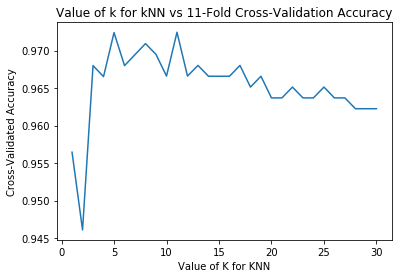

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Value of k for kNN vs 11-Fold Cross-Validation Accuracy')

In [32]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=11)
print(cross_val_score(knn, X, y, cv=11, scoring='accuracy').mean())

0.9724425641929607


In [34]:
# 15-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=11)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.970929241261722


In [36]:
# 5-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=11)
print(cross_val_score(knn, X, y, cv=12, scoring='accuracy').mean())

0.9692982456140351


## Cross-validation for SVM

In [44]:
# 11-fold cross-validation with SVM
sv = svm.SVC(kernel='rbf', gamma='auto')
scores = cross_val_score(sv, X, y, cv=11, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92063492 0.95238095 0.98412698 0.84126984 0.96774194 0.96774194
 0.98387097 0.98387097 0.96721311 0.98360656 0.98360656]
0.04118762968960283
0.9578240667611372


In [45]:
# 11-fold cross-validation with SVM
sv1 = svm.SVC(kernel='linear', gamma='auto')
scores = cross_val_score(sv1, X, y, cv=11, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92063492 1.         0.96825397 0.92063492 0.96774194 0.96774194
 1.         0.96774194 0.96721311 0.98360656 0.98360656]
0.025267392722191567
0.9679250768621472


In [46]:
# 11-fold cross-validation with SVM
sv2 = svm.SVC(kernel='poly', gamma='auto')
scores = cross_val_score(sv2, X, y, cv=11, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.87301587 0.95238095 0.92063492 0.9047619  0.98387097 0.9516129
 0.9516129  0.91935484 0.98360656 0.96721311 0.95081967]
0.03247967818241038
0.941716782541743


## Cross-Validation for Boosting

In [47]:
# 10-fold cross-validation with Boosting, Learning Rate = 0.5
boost = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.5)
scores = cross_val_score(boost, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92753623 0.98550725 0.94202899 0.94202899 1.         0.95588235
 0.92647059 1.         0.98529412 1.        ]
0.029175610550318924
0.9664748508098893


In [48]:
# 10-fold cross-validation with Boosting, Learning Rate = 1.0
boost1 = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 1.0)
scores = cross_val_score(boost1, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.94202899 0.97101449 0.94202899 0.94202899 0.98529412 0.95588235
 0.95588235 1.         0.98529412 0.98507463]
0.020532957533830505
0.9664529017317506


In [49]:
# 10-fold cross-validation with Boosting Learning Rate = 0.25
boost2 = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.25)
scores = cross_val_score(boost2, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.91304348 0.97101449 0.94202899 0.94202899 0.98529412 0.95588235
 0.95588235 1.         0.98529412 0.97014925]
0.024384708553049975
0.9620618136936798


In [50]:
# 10-fold cross-validation with Boosting Learning Rate = 0.10
boost3 = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.10)
scores = cross_val_score(boost3, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92753623 0.95652174 0.94202899 0.94202899 1.         0.97058824
 0.95588235 0.98529412 0.98529412 1.        ]
0.02428123714976621
0.9665174765558397


## Cross-Validation for Neural Networks

In [62]:
# 10-fold cross-validation with Neural Networks - 3 Layers
ann = MLPClassifier(hidden_layer_sizes=(9,9,9),activation='logistic',max_iter=500, solver='lbfgs')
scores = cross_val_score(ann, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.86956522 0.91304348 0.95652174 0.94202899 0.98529412 0.94117647
 0.92647059 0.97058824 0.98529412 0.94029851]
0.03331121904764004
0.9430281457164307


In [78]:
# 10-fold cross-validation with Neural Networks - 3 Layers
ann1 = MLPClassifier(hidden_layer_sizes=(9,9,9),activation='logistic',max_iter=1500, solver='lbfgs')
scores = cross_val_score(ann1, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.95652174 0.92753623 0.94202899 0.94202899 0.97058824 0.94117647
 0.95588235 0.98529412 0.98529412 1.        ]
0.02251855062220394
0.9606351236146633


In [79]:
# 10-fold cross-validation with Neural Networks - 3 Layers
ann2 = MLPClassifier(hidden_layer_sizes=(9,9,9),activation='logistic',max_iter=2000, solver='lbfgs')
scores = cross_val_score(ann2, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.89855072 0.94202899 0.92753623 0.92753623 0.98529412 0.92647059
 0.95588235 0.98529412 0.97058824 0.97014925]
0.02760050053541798
0.9489330839409092


In [80]:
# 10-fold cross-validation with Neural Networks - 2 Layers
ann3 = MLPClassifier(hidden_layer_sizes=(9,9),max_iter=500, solver='lbfgs')
scores = cross_val_score(ann3, X, y, cv=5, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.89781022 0.94160584 0.94160584 0.97810219 0.94814815]
0.025662140070381322
0.9414544471478777


In [61]:
# 10-fold cross-validation with Neural networks - 2 Layers
ann2 = MLPClassifier(hidden_layer_sizes=(9,9),max_iter=1500, solver='lbfgs')
scores = cross_val_score(ann2, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.86956522 0.89855072 0.94202899 0.95652174 1.         0.94117647
 0.95588235 0.98529412 0.94117647 0.98507463]
0.03785223130705779
0.9475270705297044


In [77]:
#from sklearn.linear_model import LogisticRegression
# 10-fold cross-validation with SoftMax 2750 Iterations to Converge
ann3 = LogisticRegression(solver='lbfgs')
scores = cross_val_score(ann3, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.92753623 0.97101449 0.94202899 0.94202899 1.         0.97058824
 0.95588235 0.98529412 0.98529412 1.        ]
0.024072991447842765
0.9679667519181585


In [76]:
#from sklearn.linear_model import LogisticRegression
# 10-fold cross-validation with SoftMax 2750 Iterations to Converge
ann4 = LogisticRegression(solver = 'liblinear')
scores = cross_val_score(ann4, X, y, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.91304348 0.91304348 0.94202899 0.94202899 0.98529412 0.97058824
 0.97058824 0.98529412 0.98529412 1.        ]
0.029654938550682883
0.9607203751065644


### Splitting the dataset into training and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print (X_train[0:5])
print (y_train[0:5])

[[ 5  3  3  4  2  4  3  4  1]
 [10  1  1  1  2 10  5  4  1]
 [ 4  1  1  1  2  1  1  2  1]
 [ 4  1  1  1  2  1  2  1  1]
 [ 3  1  1  1  2  1  3  1  1]]
[4 4 2 2 2]


## Learning Curves

In [8]:
train_sizes=np.linspace(0.1, 1.0, 10)
#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)

In [9]:
#Learning Curve Function
#The intention is to use mean squared error(MSE) metric, we use a proxy, negative MSE
#CV represents the k-fold cross-validation

def learning_curves(estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes = train_sizes, cv = cv, error_score = np.nan)

    train_scores_mean = train_scores.mean(axis = 1)
    ymax = train_scores.max()
    ylim = ymax * 1.5

    validation_scores_mean = validation_scores.mean(axis = 1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Cross-validation Score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training Set Size', fontsize = 14)
    title = 'Learning Curve for a ' + str(estimator).split('(')[0] + ' Model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,ylim)
    

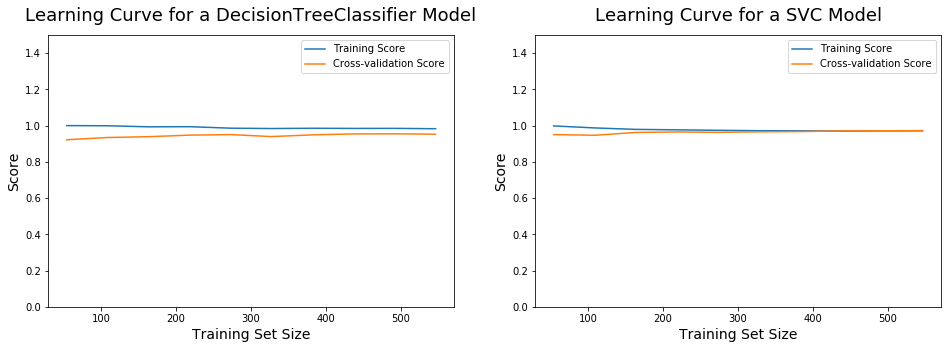

In [9]:
#Plotting the Learning Curves for Decision Tree(Pruning), Neural Networks, Boosting, Support Vector Machines, and k-Nearest Neighbors
plt.figure(figsize = (16,5))

for model,i in [(DecisionTreeClassifier(criterion = 'gini', max_depth = 5), 1),(svm.SVC(kernel='linear', gamma = 'auto'), 2)]:
    plt.subplot(1,2,i)
    learning_curves(model, X, y, train_sizes, cv)

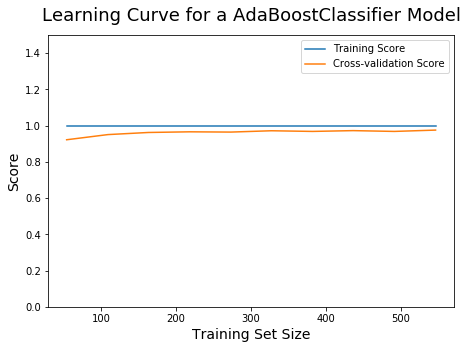

In [10]:
plt.figure(figsize = (16,5))
for model,i in [(AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.5), 1)]:
    plt.subplot(1,2,i)
    
    learning_curves(model, X, y, train_sizes, cv)

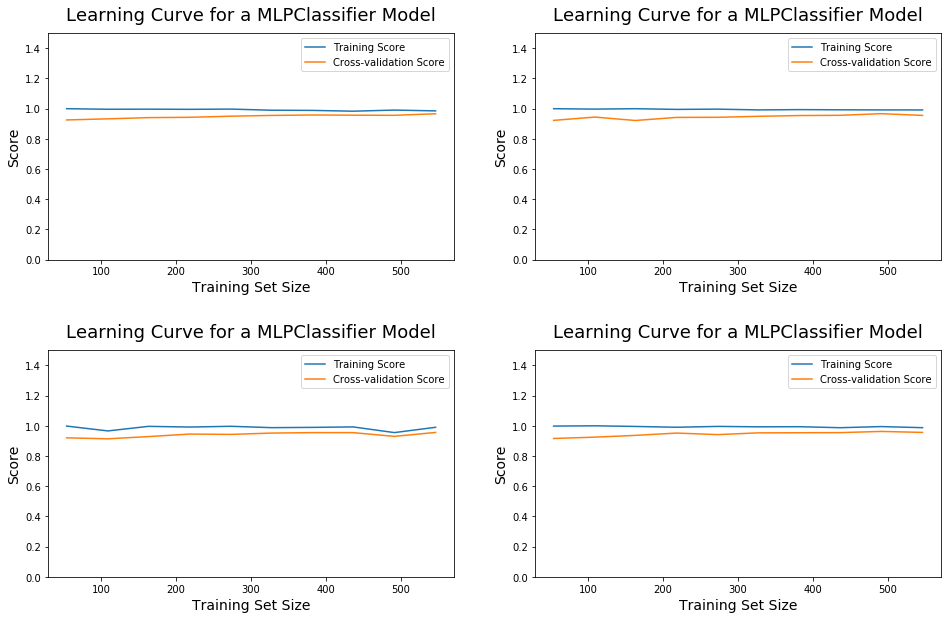

In [11]:
plt.figure(figsize = (16,10))
for model,i in [(MLPClassifier(hidden_layer_sizes=(9,9),max_iter=500, solver='lbfgs'), 1), 
                (MLPClassifier(hidden_layer_sizes=(9,9),max_iter=750, solver='lbfgs'), 2),
                (MLPClassifier(hidden_layer_sizes=(9,9),max_iter=1000, solver='lbfgs'), 3),
                (MLPClassifier(hidden_layer_sizes=(9,9),max_iter=1500, solver='lbfgs'), 4)]:
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace = 0.4)
    learning_curves(model, X, y, train_sizes, cv)

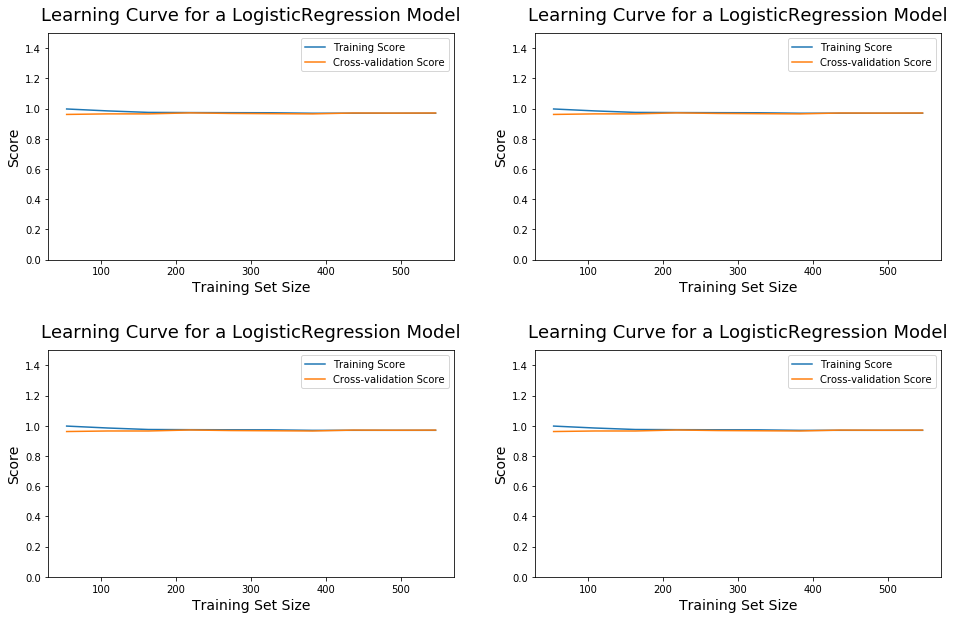

In [10]:
plt.figure(figsize = (16,10))
for model,i in [(LogisticRegression(multi_class='multinomial',max_iter=500, solver='lbfgs'), 1), 
                (LogisticRegression(multi_class='multinomial',max_iter=1000, solver='lbfgs'), 2), 
                (LogisticRegression(multi_class='multinomial',max_iter=2000, solver='lbfgs'), 3), 
                (LogisticRegression(multi_class='multinomial',max_iter=3000, solver='lbfgs'), 4)]:
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace = 0.4)
    learning_curves(model, X, y, train_sizes, cv)

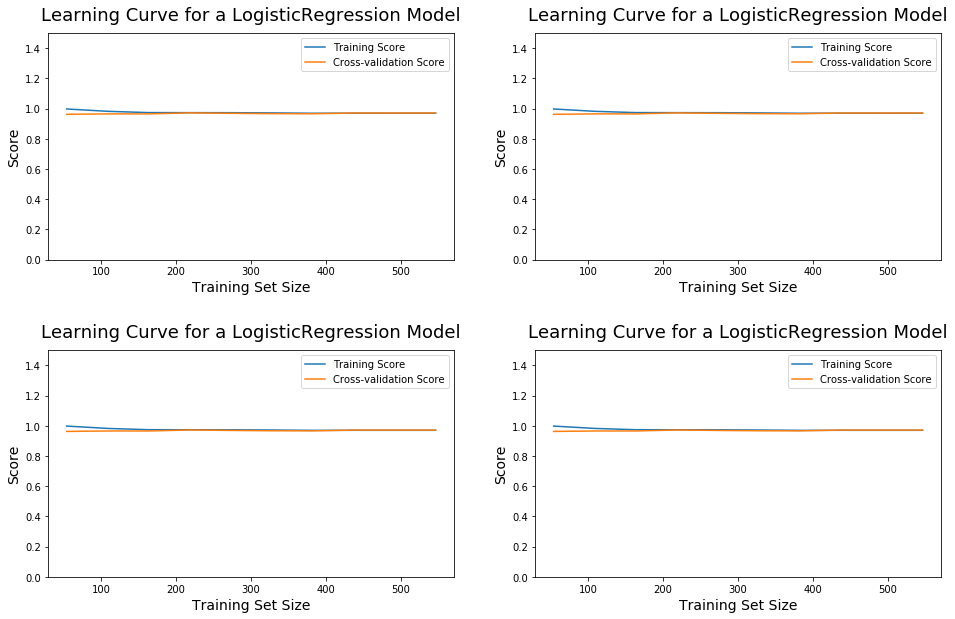

In [11]:
plt.figure(figsize = (16,10))
for model,i in [(LogisticRegression(max_iter=500, solver='lbfgs'), 1), 
                (LogisticRegression(max_iter=1000, solver='lbfgs'), 2), 
                (LogisticRegression(max_iter=2000, solver='lbfgs'), 3), 
                (LogisticRegression(max_iter=3000, solver='lbfgs'), 4)]:
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace = 0.4)
    learning_curves(model, X, y, train_sizes, cv)

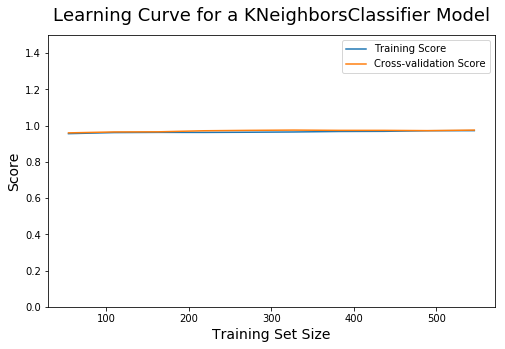

In [13]:
plt.figure(figsize = (8,5))
for model,i in [(KNeighborsClassifier(n_neighbors = 11), 1)]:
    plt.subplot(1,1,i)
    plt.subplots_adjust(hspace = 0.6)
    learning_curves(model, X, y, train_sizes, cv)  

<hr>

<div id="setting_up_tree">
    <h2>Split Data Set</h2>
    We will be using <b>train/test split</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [93]:
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (478, 9) (478,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [94]:
print ('Test set:',X_test.shape, y_test.shape)

Test set: (205, 9) (205,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>cancerTree</b>.<br>
    Inside of the classifier, specify <i> criterion="gini" </i> so we can see the information gain of each node.
</div>

In [133]:
start_time = time.time()
cancerTree = DecisionTreeClassifier()
cancerTree.fit(X_train,y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.0012161731719970703 seconds ---


Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [97]:
predTreeCancer = cancerTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [98]:
print (predTreeCancer [0:5])
print (y_test [0:5])


[2 4 2 4 4]
[2 4 2 4 4]


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [99]:
print("DecisionTrees's before pruning Accuracy: ", metrics.accuracy_score(y_test, predTreeCancer))

DecisionTrees's before pruning Accuracy:  0.9560975609756097


In [100]:
print("Decision Tree before pruning F1_Score:", f1_score(y_test, predTreeCancer, average='weighted'))

Decision Tree before pruning F1_Score: 0.9557814643177674


In [101]:
print("Decision Tree before pruning Jaccard Score:", jaccard_similarity_score(y_test, predTreeCancer))

Decision Tree before pruning Jaccard Score: 0.9560975609756097


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       128
           4       0.97      0.91      0.94        77

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

Confusion matrix, without normalization
[[126   2]
 [  7  70]]


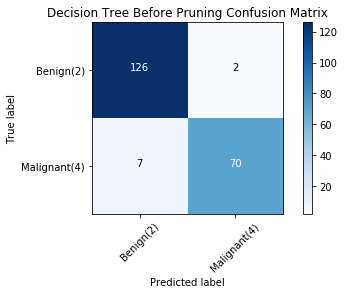

In [104]:
# Compute confusion matrix
dt_cancer_matrix = confusion_matrix(y_test, predTreeCancer, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTreeCancer))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt_cancer_matrix, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='Decision Tree Before Pruning Confusion Matrix')

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

<Figure size 432x288 with 0 Axes>

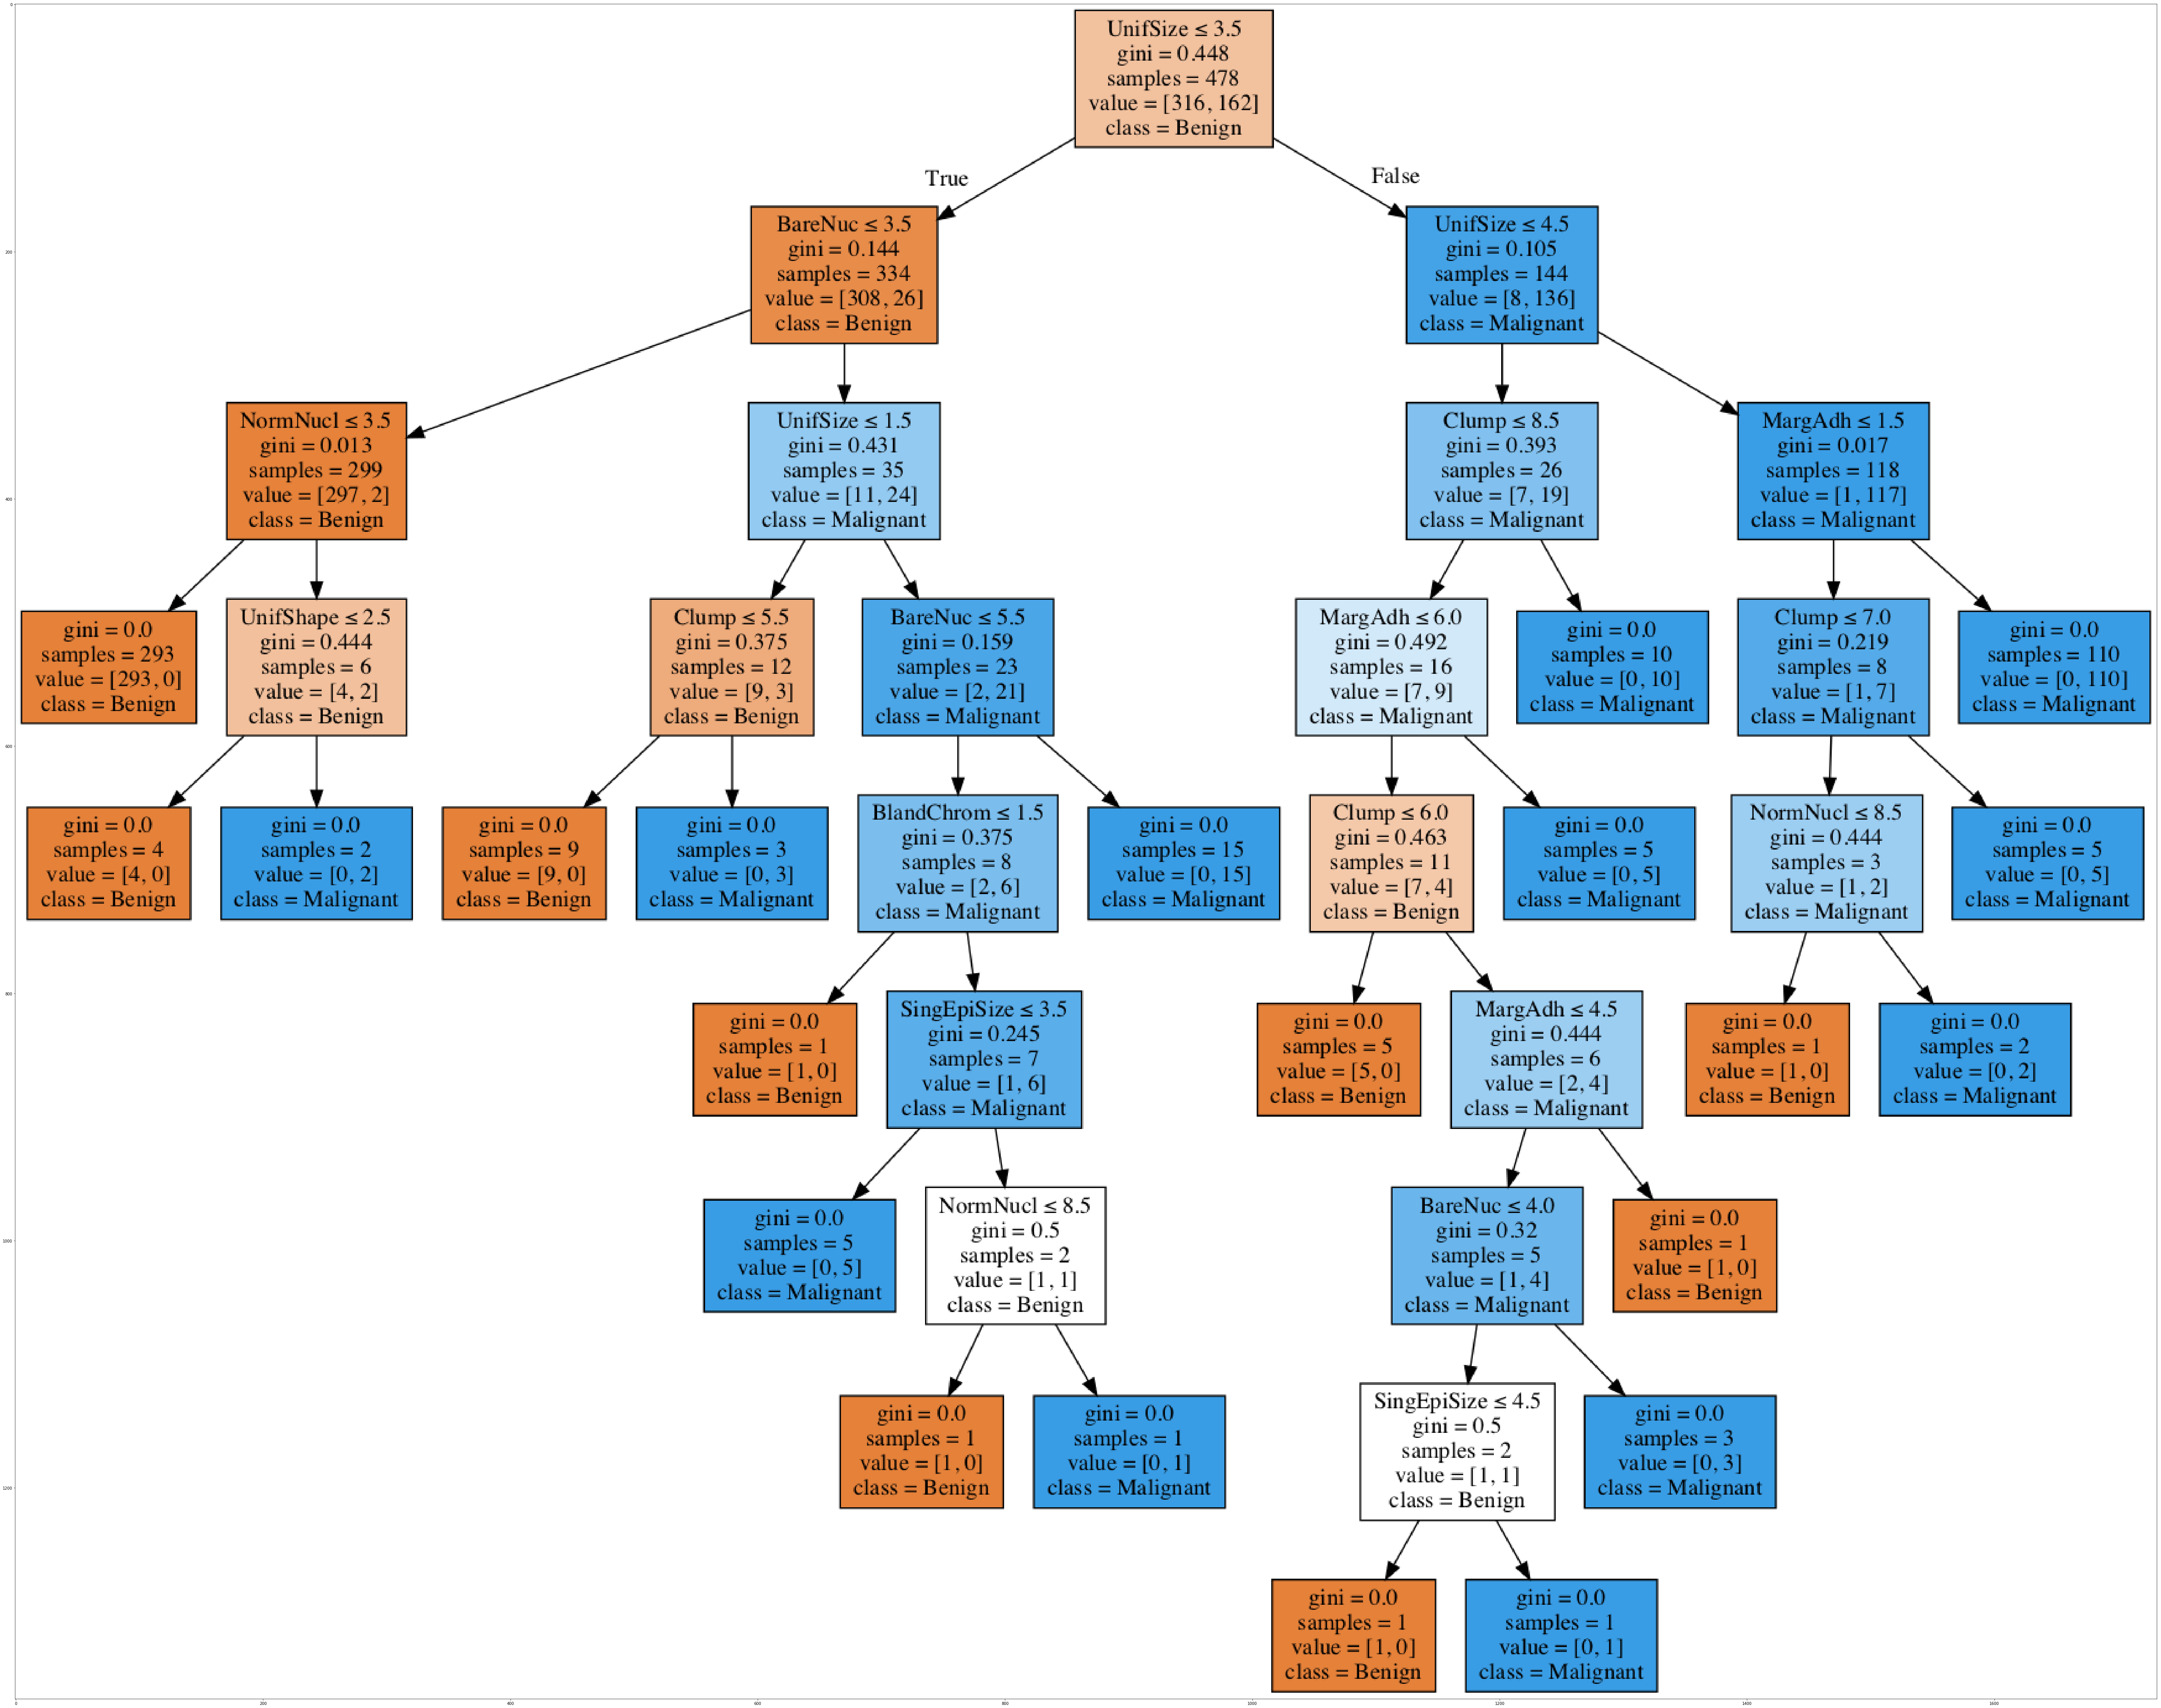

In [105]:
plt.clf()
dot_data = StringIO()
filename = "cancertreebp.png"
featureNames = cancer_data.columns[1:10]
#targetNames = cancer_data["Class"].unique().tolist()
targetNames = [2,4]
out=tree.export_graphviz(cancerTree,feature_names=featureNames, out_file=dot_data, class_names= ['Benign','Malignant'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


<h2>Modeling with Pruning</h2>
    


In [134]:
start_time = time.time()
cancerTree2 = DecisionTreeClassifier(max_depth = 5)
cancerTree2.fit(X_train,y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.0013880729675292969 seconds ---


<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [135]:
predTreeCancer2 = cancerTree2.predict(X_test)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [136]:
print (predTreeCancer2 [0:5])
print (y_test [0:5])


[2 4 2 4 4]
[2 4 2 4 4]


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [137]:
print("DecisionTrees's before pruning Accuracy: ", metrics.accuracy_score(y_test, predTreeCancer2))

DecisionTrees's before pruning Accuracy:  0.9560975609756097


In [138]:
print("Decision Tree before pruning F1_Score:", f1_score(y_test, predTreeCancer2, average='weighted'))

Decision Tree before pruning F1_Score: 0.9559157052615298


In [139]:
print("Decision Tree before pruning Jaccard Score:", jaccard_similarity_score(y_test, predTreeCancer2))

Decision Tree before pruning Jaccard Score: 0.9560975609756097


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


              precision    recall  f1-score   support

           2       0.95      0.98      0.97       128
           4       0.97      0.91      0.94        77

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

Confusion matrix, without normalization
[[126   2]
 [  8  69]]


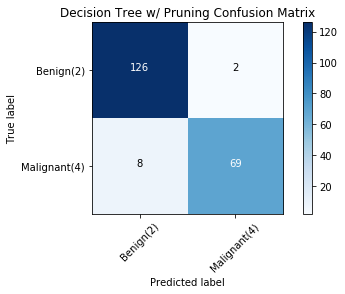

In [114]:
# Compute confusion matrix
dt_cancer_matrix2 = confusion_matrix(y_test, predTreeCancer2, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTreeCancer))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt_cancer_matrix2, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='Decision Tree w/ Pruning Confusion Matrix')

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

Text(0.5, 1.0, 'Decision Tree w/Pruning')

<Figure size 432x288 with 0 Axes>

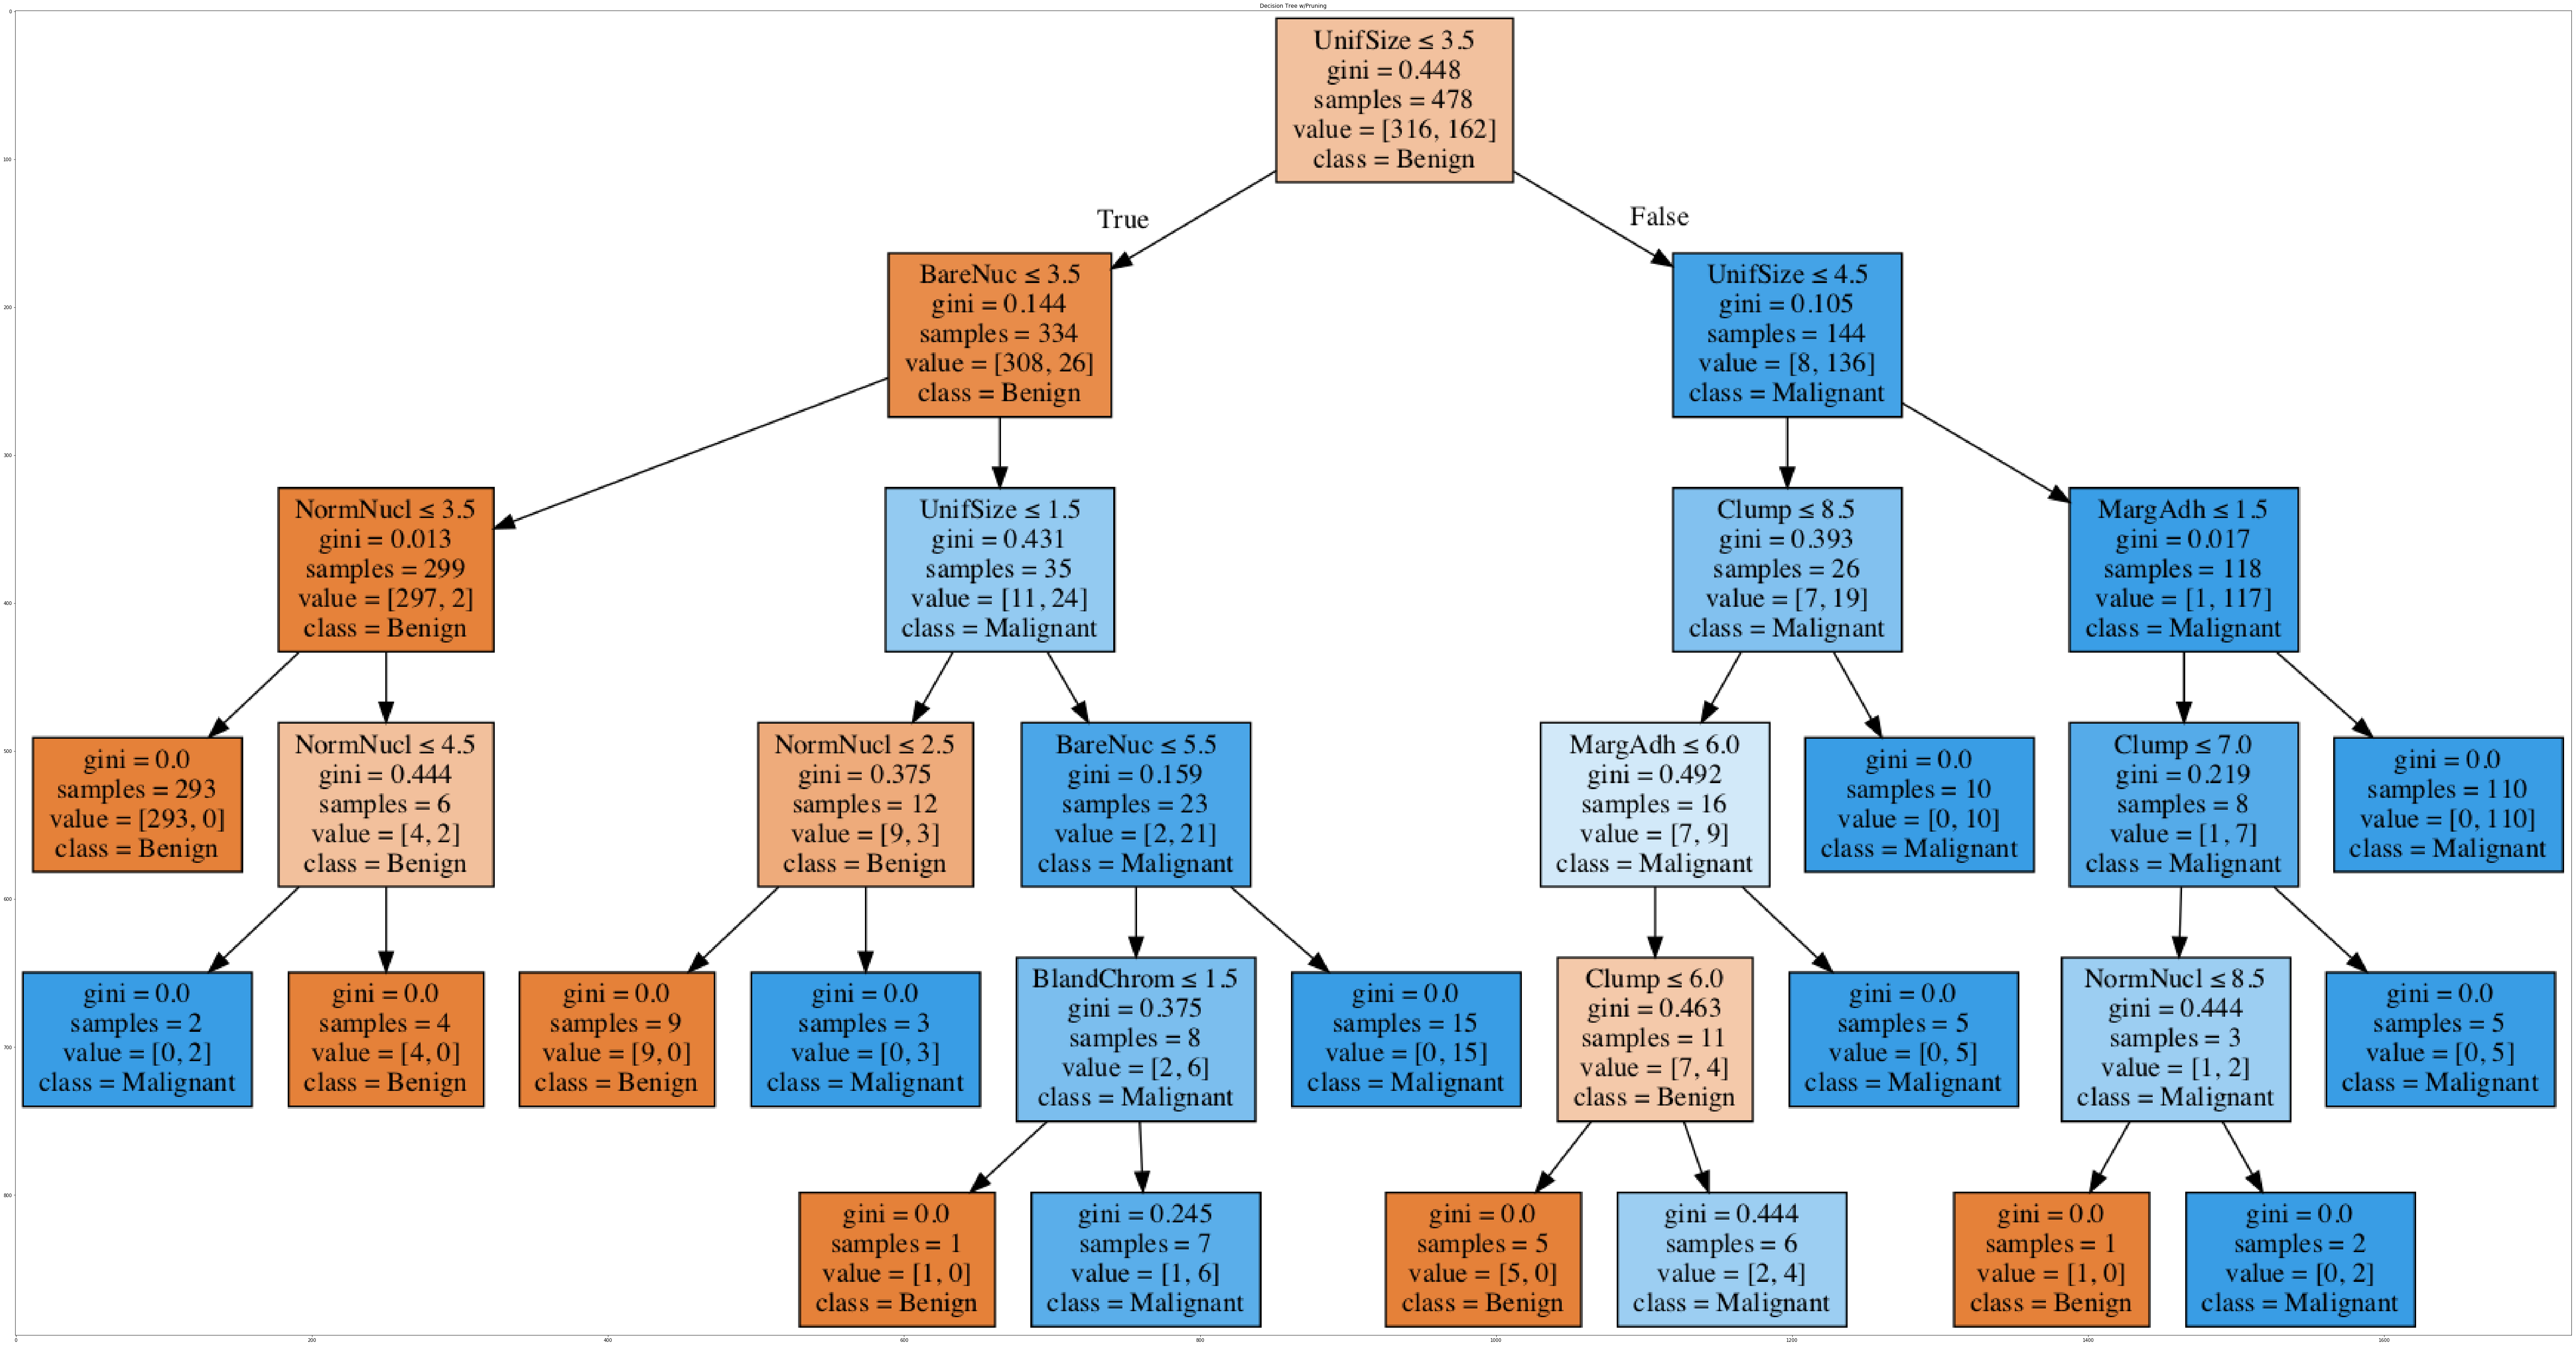

In [115]:
plt.clf()
dot_data = StringIO()
filename = "cancertreebp.png"
featureNames = cancer_data.columns[1:10]
#targetNames = cancer_data["Class"].unique().tolist()
targetNames = [2,4]
out=tree.export_graphviz(cancerTree2,feature_names=featureNames, out_file=dot_data, class_names= ['Benign','Malignant'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.title("Decision Tree w/Pruning")

In [63]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)
#scaler.fit(X)

# Now apply the transformations to the data:
#X_N = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [72]:
print (X_train[0:5])
print (y_train[0:5])

    Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
77   26   19.161      1      0        1       0          0                 0   
73   41   22.905      1      0        0       0          1                 0   
71   28   19.675      1      0        0       0          1                 1   
78   19   13.313      1      0        1       0          0                 1   
42   50   15.790      0      1        0       0          1                 0   

    Cholesterol_NORMAL  
77                   1  
73                   1  
71                   0  
78                   0  
42                   1  
77    4
73    4
71    4
78    0
42    4
Name: Drugs, dtype: int64


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [116]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(9,9),max_iter=500, solver='lbfgs')
mlp.fit(X_train,y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.23999309539794922 seconds ---


In [14]:
start_time = time.time()
logistic = LogisticRegression(solver="lbfgs")
logistic.fit(X_train, y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.010362863540649414 seconds ---


In [118]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
predictions = mlp.predict(X_test)

In [16]:
predictions_logistic = logistic.predict(X_test)

In [122]:
print(confusion_matrix(y_test,predictions))

[[124   4]
 [  3  74]]


In [17]:
print (confusion_matrix(y_test, predictions_logistic))

[[124   4]
 [  4  73]]


In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97       128
           4       0.95      0.96      0.95        77

   micro avg       0.97      0.97      0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [125]:
print(classification_report(y_test, predictions_soft))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       128
           4       0.95      0.95      0.95        77

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [126]:
print("ANN Accuracy: ", metrics.accuracy_score(y_test, predictions))

ANN Accuracy:  0.9658536585365853


In [18]:
print("Softmax Accuracy: ", metrics.accuracy_score(y_test, predictions_logistic))

Softmax Accuracy:  0.9609756097560975


              precision    recall  f1-score   support

           2       0.95      0.98      0.97       128
           4       0.97      0.91      0.94        77

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

Confusion matrix, without normalization
[[124   4]
 [  3  74]]


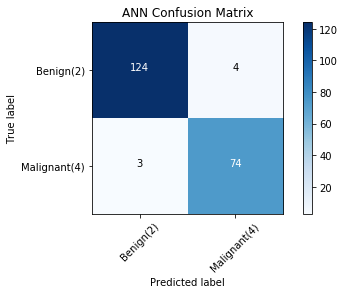

In [140]:
# Compute confusion matrix
dt_cancer_matrix3 = confusion_matrix(y_test, predictions, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTreeCancer))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt_cancer_matrix3, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='ANN Confusion Matrix')

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       128
           4       0.95      0.95      0.95        77

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

Confusion matrix, without normalization
[[124   4]
 [  4  73]]


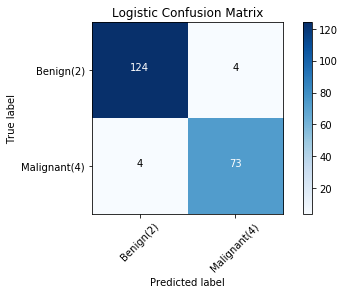

In [19]:
# Compute confusion matrix
dt_cancer_matrix4 = confusion_matrix(y_test, predictions_logistic, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions_logistic))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt_cancer_matrix4, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='Logistic Confusion Matrix')

In [141]:
jaccard_similarity_score(y_test, predictions)

0.9658536585365853

In [142]:
jaccard_similarity_score(y_test, predictions_soft)

0.9609756097560975



<h1><center>Support Vector Machine</center></h1>



The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [144]:
#Different Kernels
start_time = time.time()
clf_radial = svm.SVC(kernel='rbf', gamma = 'auto')
clf_radial.fit(X_train, y_train) 
print("---%s seconds ---" % (time.time() - start_time))

---0.004649162292480469 seconds ---


In [145]:
start_time = time.time()
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 
print("---%s seconds ---" % (time.time() - start_time))

---0.0044629573822021484 seconds ---


In [148]:
start_time = time.time()
clf_poly = svm.SVC(kernel='poly', gamma = 'auto')
clf_poly.fit(X_train, y_train) 
print("---%s seconds ---" % (time.time() - start_time))

---0.03843998908996582 seconds ---


In [149]:
start_time = time.time()
clf_sig = svm.SVC(kernel='sigmoid', gamma = 'auto')
clf_sig.fit(X_train, y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.006925106048583984 seconds ---


In [150]:
yhat_radial = clf_radial.predict(X_test)

In [151]:
f1_score(y_test, yhat_radial, average='weighted') 

0.9660504476953362

In [152]:
yhat_linear = clf_linear.predict(X_test)

In [153]:
f1_score(y_test, yhat_linear, average='weighted') 

0.9609756097560975

In [154]:
yhat_poly = clf_poly.predict(X_test)

In [155]:
f1_score(y_test, yhat_poly, average='weighted') 

0.9559157052615298

In [156]:
yhat_sig = clf_sig.predict(X_test)

In [157]:
f1_score(y_test, yhat_sig, average='weighted') 

0.30413104131041313

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       128
           4       0.93      0.99      0.96        77

   micro avg       0.97      0.97      0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205

Confusion matrix, without normalization
[[122   6]
 [  1  76]]


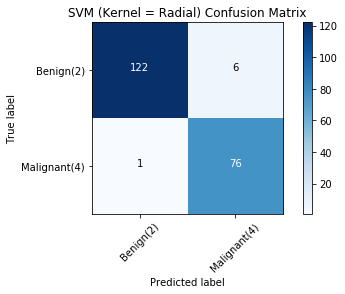

In [159]:
# Compute confusion matrix
svm_cancer_matrix = confusion_matrix(y_test, yhat_radial, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_radial))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cancer_matrix, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='SVM (Kernel = Radial) Confusion Matrix')

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       128
           4       0.95      0.95      0.95        77

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

Confusion matrix, without normalization
[[124   4]
 [  4  73]]


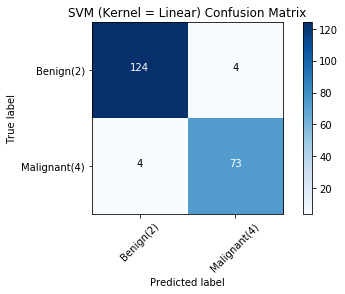

In [160]:
# Compute confusion matrix
svm_cancer_matrix_linear = confusion_matrix(y_test, yhat_linear, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cancer_matrix_linear, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='SVM (Kernel = Linear) Confusion Matrix')

              precision    recall  f1-score   support

           2       0.46      0.52      0.49       128
           4       0.00      0.00      0.00        77

   micro avg       0.32      0.32      0.32       205
   macro avg       0.23      0.26      0.24       205
weighted avg       0.29      0.32      0.30       205

Confusion matrix, without normalization
[[66 62]
 [77  0]]


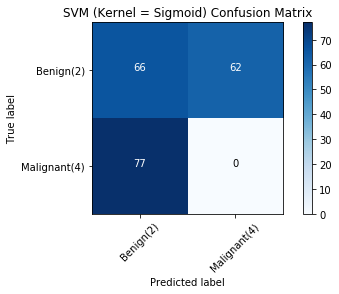

In [161]:
# Compute confusion matrix
svm_cancer_matrix_sig = confusion_matrix(y_test, yhat_sig, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_sig))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cancer_matrix_sig, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='SVM (Kernel = Sigmoid) Confusion Matrix')

In [162]:
jaccard_similarity_score(y_test, yhat_linear)

0.9609756097560975

<h1><center>k-Nearest Neighbors</center></h1>

#### Different K values
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [163]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95, 0.93, 0.96, 0.97, 0.97, 0.96, 0.96, 0.96, 0.96])

#### Plot  model accuracy  for Different number of Neighbors 

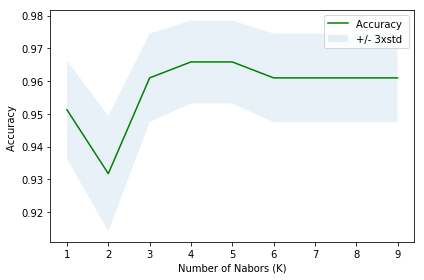

In [164]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [165]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9658536585365853 with k= 4


### Training

k = 4 has the best accuracy value

In [166]:
k = 4
#Train Model and Predict  
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.0009312629699707031 seconds ---


In [167]:
yhat_k1 = neigh.predict(X_test)

In [168]:
f1_score(y_test, yhat_k1, average='weighted') 

0.9658085017563383

In [169]:
jaccard_similarity_score(y_test, yhat_k1)

0.9658536585365853

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       128
           4       0.96      0.95      0.95        77

   micro avg       0.97      0.97      0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205

Confusion matrix, without normalization
[[125   3]
 [  4  73]]


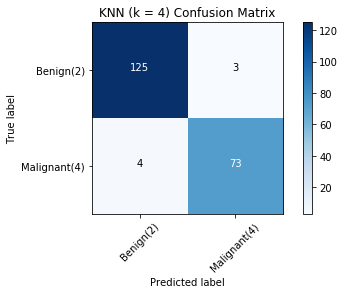

In [170]:
# Compute confusion matrix
svm_cancer_matrix_knn = confusion_matrix(y_test, yhat_k1, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_k1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cancer_matrix_knn, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='KNN (k = 4) Confusion Matrix')

<h1><center>Boosting</center></h1>

In [171]:
start_time = time.time()
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.22532391548156738 seconds ---


In [172]:
yhat_ada = ada_clf.predict(X_test)

In [173]:
f1_score(y_test, yhat_ada, average='weighted') 

0.9756981777164012

In [174]:
jaccard_similarity_score(y_test, yhat_ada)

0.975609756097561

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       128
           4       0.95      0.99      0.97        77

   micro avg       0.98      0.98      0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205

Confusion matrix, without normalization
[[124   4]
 [  1  76]]


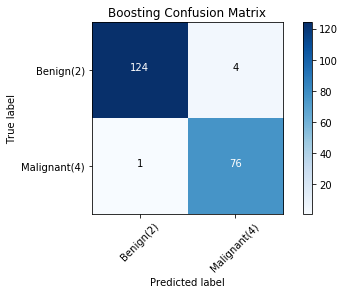

In [175]:
# Compute confusion matrix
svm_cancer_matrix_boosting = confusion_matrix(y_test, yhat_ada, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_ada))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cancer_matrix_boosting, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='Boosting Confusion Matrix')